In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   2   3   4   5   6   7   8   9  11  13  16  18  19  20  22  23  24
  25  26  27  28  29  30  32  33  35  36  38  39  40  41  42  43  44  47
  49  50  51  53  54  56  57  58  59  60  61  62  63  65  67  68  69  70
  72  73  74  76  77  79  80  81  82  83  84  86  87  88  91  93  94  95
  97  98  99 100 101 104 105 106 109 110 111 112 113 114 115 116 117 119
 120 121 123 124 125 126 128 129 130 131 133 134 135 136 137 138 139 140
 141 143 144 145 146 147 148 149 150 151 152 153 154 155 156 158 159 160
 161 163 164 166 167 168 169 174 175 176 177 179 180 181 182 183 184 185
 186 187 189 191 192 193 194 195 197 198 199 201 203 204 207 208 209 212
 214 215 216 217 218 219 220 221 222 223 224 226 227 228 229 232 234 237
 238 241 244 247 248 251 253 254 255 256 257 258 259 260 262 264 265 266
 267 268 269 270 273 274 275 276 277 280 281 283 284 285 286 287 288 289
 290 291 292 294 295 296 297 298 300 301 302 303 304 305 306 307 308 309
 310 311 314 315 316 317 318 319 321 322 323

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=5,
                      seed=82)

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[15:58:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.00000	validation_0-mlogloss:1.09238	validation_1-merror:0.00000	validation_1-mlogloss:1.09247
[1]	validation_0-merror:0.00000	validation_0-mlogloss:1.08548	validation_1-merror:0.00000	validation_1-mlogloss:1.08592
[2]	validation_0-merror:0.00000	validation_0-mlogloss:1.07902	validation_1-merror:0.00000	validation_1-mlogloss:1.07949
[3]	validation_0-merror:0.00000	validation_0-mlogloss:1.07262	validation_1-merror:0.00000	validation_1-mlogloss:1.07337
[4]	validation_0-merror:0.00000	validation_0-mlogloss:1.06659	validation_1-merror:0.00000	validation_1-mlogloss:1.06758
[5]	validation_0-merror:0.00000	validation_

[65]	validation_0-merror:0.00000	validation_0-mlogloss:0.74603	validation_1-merror:0.00000	validation_1-mlogloss:0.75001
[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.74154	validation_1-merror:0.00000	validation_1-mlogloss:0.74550
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.73814	validation_1-merror:0.00000	validation_1-mlogloss:0.74222
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.73428	validation_1-merror:0.00000	validation_1-mlogloss:0.73837
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.72988	validation_1-merror:0.00000	validation_1-mlogloss:0.73395
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.72625	validation_1-merror:0.00000	validation_1-mlogloss:0.73028
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.72265	validation_1-merror:0.00000	validation_1-mlogloss:0.72684
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.71833	validation_1-merror:0.00000	validation_1-mlogloss:0.72250
[73]	validation_0-merror:0.00000

[133]	validation_0-merror:0.00000	validation_0-mlogloss:0.52452	validation_1-merror:0.00000	validation_1-mlogloss:0.52955
[134]	validation_0-merror:0.00000	validation_0-mlogloss:0.52259	validation_1-merror:0.00000	validation_1-mlogloss:0.52767
[135]	validation_0-merror:0.00000	validation_0-mlogloss:0.51965	validation_1-merror:0.00000	validation_1-mlogloss:0.52470
[136]	validation_0-merror:0.00000	validation_0-mlogloss:0.51672	validation_1-merror:0.00000	validation_1-mlogloss:0.52175
[137]	validation_0-merror:0.00000	validation_0-mlogloss:0.51418	validation_1-merror:0.00000	validation_1-mlogloss:0.51919
[138]	validation_0-merror:0.00000	validation_0-mlogloss:0.51129	validation_1-merror:0.00000	validation_1-mlogloss:0.51627
[139]	validation_0-merror:0.00000	validation_0-mlogloss:0.50897	validation_1-merror:0.00000	validation_1-mlogloss:0.51398
[140]	validation_0-merror:0.00000	validation_0-mlogloss:0.50611	validation_1-merror:0.00000	validation_1-mlogloss:0.51110
[141]	validation_0-merro

[201]	validation_0-merror:0.00000	validation_0-mlogloss:0.38173	validation_1-merror:0.00000	validation_1-mlogloss:0.38692
[202]	validation_0-merror:0.00000	validation_0-mlogloss:0.38009	validation_1-merror:0.00000	validation_1-mlogloss:0.38528
[203]	validation_0-merror:0.00000	validation_0-mlogloss:0.37885	validation_1-merror:0.00000	validation_1-mlogloss:0.38406
[204]	validation_0-merror:0.00000	validation_0-mlogloss:0.37758	validation_1-merror:0.00000	validation_1-mlogloss:0.38275
[205]	validation_0-merror:0.00000	validation_0-mlogloss:0.37586	validation_1-merror:0.00000	validation_1-mlogloss:0.38103
[206]	validation_0-merror:0.00000	validation_0-mlogloss:0.37496	validation_1-merror:0.00000	validation_1-mlogloss:0.38020
[207]	validation_0-merror:0.00000	validation_0-mlogloss:0.37361	validation_1-merror:0.00000	validation_1-mlogloss:0.37887
[208]	validation_0-merror:0.00000	validation_0-mlogloss:0.37280	validation_1-merror:0.00000	validation_1-mlogloss:0.37809
[209]	validation_0-merro

[268]	validation_0-merror:0.00000	validation_0-mlogloss:0.28425	validation_1-merror:0.00000	validation_1-mlogloss:0.28912
[269]	validation_0-merror:0.00000	validation_0-mlogloss:0.28275	validation_1-merror:0.00000	validation_1-mlogloss:0.28760
[270]	validation_0-merror:0.00000	validation_0-mlogloss:0.28126	validation_1-merror:0.00000	validation_1-mlogloss:0.28609
[271]	validation_0-merror:0.00000	validation_0-mlogloss:0.28010	validation_1-merror:0.00000	validation_1-mlogloss:0.28496
[272]	validation_0-merror:0.00000	validation_0-mlogloss:0.27929	validation_1-merror:0.00000	validation_1-mlogloss:0.28418
[273]	validation_0-merror:0.00000	validation_0-mlogloss:0.27815	validation_1-merror:0.00000	validation_1-mlogloss:0.28307
[274]	validation_0-merror:0.00000	validation_0-mlogloss:0.27669	validation_1-merror:0.00000	validation_1-mlogloss:0.28158
[275]	validation_0-merror:0.00000	validation_0-mlogloss:0.27567	validation_1-merror:0.00000	validation_1-mlogloss:0.28054
[276]	validation_0-merro

[335]	validation_0-merror:0.00000	validation_0-mlogloss:0.21533	validation_1-merror:0.00000	validation_1-mlogloss:0.21974
[336]	validation_0-merror:0.00000	validation_0-mlogloss:0.21443	validation_1-merror:0.00000	validation_1-mlogloss:0.21882
[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.21359	validation_1-merror:0.00000	validation_1-mlogloss:0.21799
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.21249	validation_1-merror:0.00000	validation_1-mlogloss:0.21687
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.21160	validation_1-merror:0.00000	validation_1-mlogloss:0.21597
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.21077	validation_1-merror:0.00000	validation_1-mlogloss:0.21513
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.20994	validation_1-merror:0.00000	validation_1-mlogloss:0.21431
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.20913	validation_1-merror:0.00000	validation_1-mlogloss:0.21350
[343]	validation_0-merro

[403]	validation_0-merror:0.00000	validation_0-mlogloss:0.16198	validation_1-merror:0.00000	validation_1-mlogloss:0.16601
[404]	validation_0-merror:0.00000	validation_0-mlogloss:0.16135	validation_1-merror:0.00000	validation_1-mlogloss:0.16539
[405]	validation_0-merror:0.00000	validation_0-mlogloss:0.16054	validation_1-merror:0.00000	validation_1-mlogloss:0.16456
[406]	validation_0-merror:0.00000	validation_0-mlogloss:0.16009	validation_1-merror:0.00000	validation_1-mlogloss:0.16411
[407]	validation_0-merror:0.00000	validation_0-mlogloss:0.15928	validation_1-merror:0.00000	validation_1-mlogloss:0.16328
[408]	validation_0-merror:0.00000	validation_0-mlogloss:0.15868	validation_1-merror:0.00000	validation_1-mlogloss:0.16269
[409]	validation_0-merror:0.00000	validation_0-mlogloss:0.15824	validation_1-merror:0.00000	validation_1-mlogloss:0.16224
[410]	validation_0-merror:0.00000	validation_0-mlogloss:0.15783	validation_1-merror:0.00000	validation_1-mlogloss:0.16184
[411]	validation_0-merro

[470]	validation_0-merror:0.00000	validation_0-mlogloss:0.12430	validation_1-merror:0.00000	validation_1-mlogloss:0.12776
[471]	validation_0-merror:0.00000	validation_0-mlogloss:0.12368	validation_1-merror:0.00000	validation_1-mlogloss:0.12712
[472]	validation_0-merror:0.00000	validation_0-mlogloss:0.12328	validation_1-merror:0.00000	validation_1-mlogloss:0.12673
[473]	validation_0-merror:0.00000	validation_0-mlogloss:0.12267	validation_1-merror:0.00000	validation_1-mlogloss:0.12610
[474]	validation_0-merror:0.00000	validation_0-mlogloss:0.12240	validation_1-merror:0.00000	validation_1-mlogloss:0.12583
[475]	validation_0-merror:0.00000	validation_0-mlogloss:0.12200	validation_1-merror:0.00000	validation_1-mlogloss:0.12544
[476]	validation_0-merror:0.00000	validation_0-mlogloss:0.12161	validation_1-merror:0.00000	validation_1-mlogloss:0.12503
[477]	validation_0-merror:0.00000	validation_0-mlogloss:0.12101	validation_1-merror:0.00000	validation_1-mlogloss:0.12441
[478]	validation_0-merro

[538]	validation_0-merror:0.00000	validation_0-mlogloss:0.09670	validation_1-merror:0.00000	validation_1-mlogloss:0.09963
[539]	validation_0-merror:0.00000	validation_0-mlogloss:0.09633	validation_1-merror:0.00000	validation_1-mlogloss:0.09924
[540]	validation_0-merror:0.00000	validation_0-mlogloss:0.09612	validation_1-merror:0.00000	validation_1-mlogloss:0.09904
[541]	validation_0-merror:0.00000	validation_0-mlogloss:0.09575	validation_1-merror:0.00000	validation_1-mlogloss:0.09866
[542]	validation_0-merror:0.00000	validation_0-mlogloss:0.09538	validation_1-merror:0.00000	validation_1-mlogloss:0.09828
[543]	validation_0-merror:0.00000	validation_0-mlogloss:0.09508	validation_1-merror:0.00000	validation_1-mlogloss:0.09797
[544]	validation_0-merror:0.00000	validation_0-mlogloss:0.09471	validation_1-merror:0.00000	validation_1-mlogloss:0.09759
[545]	validation_0-merror:0.00000	validation_0-mlogloss:0.09434	validation_1-merror:0.00000	validation_1-mlogloss:0.09721
[546]	validation_0-merro

[605]	validation_0-merror:0.00000	validation_0-mlogloss:0.07952	validation_1-merror:0.00000	validation_1-mlogloss:0.08210
[606]	validation_0-merror:0.00000	validation_0-mlogloss:0.07922	validation_1-merror:0.00000	validation_1-mlogloss:0.08180
[607]	validation_0-merror:0.00000	validation_0-mlogloss:0.07906	validation_1-merror:0.00000	validation_1-mlogloss:0.08163
[608]	validation_0-merror:0.00000	validation_0-mlogloss:0.07891	validation_1-merror:0.00000	validation_1-mlogloss:0.08147
[609]	validation_0-merror:0.00000	validation_0-mlogloss:0.07874	validation_1-merror:0.00000	validation_1-mlogloss:0.08131
[610]	validation_0-merror:0.00000	validation_0-mlogloss:0.07845	validation_1-merror:0.00000	validation_1-mlogloss:0.08101
[611]	validation_0-merror:0.00000	validation_0-mlogloss:0.07829	validation_1-merror:0.00000	validation_1-mlogloss:0.08085
[612]	validation_0-merror:0.00000	validation_0-mlogloss:0.07814	validation_1-merror:0.00000	validation_1-mlogloss:0.08069
[613]	validation_0-merro

[673]	validation_0-merror:0.00000	validation_0-mlogloss:0.06541	validation_1-merror:0.00000	validation_1-mlogloss:0.06769
[674]	validation_0-merror:0.00000	validation_0-mlogloss:0.06528	validation_1-merror:0.00000	validation_1-mlogloss:0.06757
[675]	validation_0-merror:0.00000	validation_0-mlogloss:0.06506	validation_1-merror:0.00000	validation_1-mlogloss:0.06733
[676]	validation_0-merror:0.00000	validation_0-mlogloss:0.06483	validation_1-merror:0.00000	validation_1-mlogloss:0.06710
[677]	validation_0-merror:0.00000	validation_0-mlogloss:0.06460	validation_1-merror:0.00000	validation_1-mlogloss:0.06686
[678]	validation_0-merror:0.00000	validation_0-mlogloss:0.06447	validation_1-merror:0.00000	validation_1-mlogloss:0.06674
[679]	validation_0-merror:0.00000	validation_0-mlogloss:0.06435	validation_1-merror:0.00000	validation_1-mlogloss:0.06661
[680]	validation_0-merror:0.00000	validation_0-mlogloss:0.06423	validation_1-merror:0.00000	validation_1-mlogloss:0.06648
[681]	validation_0-merro

[741]	validation_0-merror:0.00000	validation_0-mlogloss:0.05394	validation_1-merror:0.00000	validation_1-mlogloss:0.05590
[742]	validation_0-merror:0.00000	validation_0-mlogloss:0.05384	validation_1-merror:0.00000	validation_1-mlogloss:0.05580
[743]	validation_0-merror:0.00000	validation_0-mlogloss:0.05375	validation_1-merror:0.00000	validation_1-mlogloss:0.05570
[744]	validation_0-merror:0.00000	validation_0-mlogloss:0.05357	validation_1-merror:0.00000	validation_1-mlogloss:0.05552
[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.05339	validation_1-merror:0.00000	validation_1-mlogloss:0.05533
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.05329	validation_1-merror:0.00000	validation_1-mlogloss:0.05523
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.05312	validation_1-merror:0.00000	validation_1-mlogloss:0.05505
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.05294	validation_1-merror:0.00000	validation_1-mlogloss:0.05486
[749]	validation_0-merro

[808]	validation_0-merror:0.00000	validation_0-mlogloss:0.04703	validation_1-merror:0.00000	validation_1-mlogloss:0.04886
[809]	validation_0-merror:0.00000	validation_0-mlogloss:0.04702	validation_1-merror:0.00000	validation_1-mlogloss:0.04885
[810]	validation_0-merror:0.00000	validation_0-mlogloss:0.04701	validation_1-merror:0.00000	validation_1-mlogloss:0.04884
[811]	validation_0-merror:0.00000	validation_0-mlogloss:0.04693	validation_1-merror:0.00000	validation_1-mlogloss:0.04877
[812]	validation_0-merror:0.00000	validation_0-mlogloss:0.04685	validation_1-merror:0.00000	validation_1-mlogloss:0.04869
[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.04677	validation_1-merror:0.00000	validation_1-mlogloss:0.04861
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.04676	validation_1-merror:0.00000	validation_1-mlogloss:0.04860
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.04676	validation_1-merror:0.00000	validation_1-mlogloss:0.04860
[816]	validation_0-merro

[876]	validation_0-merror:0.00000	validation_0-mlogloss:0.04564	validation_1-merror:0.00000	validation_1-mlogloss:0.04758
[877]	validation_0-merror:0.00000	validation_0-mlogloss:0.04564	validation_1-merror:0.00000	validation_1-mlogloss:0.04758
[878]	validation_0-merror:0.00000	validation_0-mlogloss:0.04563	validation_1-merror:0.00000	validation_1-mlogloss:0.04758
[879]	validation_0-merror:0.00000	validation_0-mlogloss:0.04563	validation_1-merror:0.00000	validation_1-mlogloss:0.04757
[880]	validation_0-merror:0.00000	validation_0-mlogloss:0.04562	validation_1-merror:0.00000	validation_1-mlogloss:0.04757
[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.04562	validation_1-merror:0.00000	validation_1-mlogloss:0.04757
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.04562	validation_1-merror:0.00000	validation_1-mlogloss:0.04757
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.04561	validation_1-merror:0.00000	validation_1-mlogloss:0.04756
[884]	validation_0-merro

[944]	validation_0-merror:0.00000	validation_0-mlogloss:0.04498	validation_1-merror:0.00000	validation_1-mlogloss:0.04701
[945]	validation_0-merror:0.00000	validation_0-mlogloss:0.04498	validation_1-merror:0.00000	validation_1-mlogloss:0.04701
[946]	validation_0-merror:0.00000	validation_0-mlogloss:0.04498	validation_1-merror:0.00000	validation_1-mlogloss:0.04701
[947]	validation_0-merror:0.00000	validation_0-mlogloss:0.04498	validation_1-merror:0.00000	validation_1-mlogloss:0.04700
[948]	validation_0-merror:0.00000	validation_0-mlogloss:0.04497	validation_1-merror:0.00000	validation_1-mlogloss:0.04700
[949]	validation_0-merror:0.00000	validation_0-mlogloss:0.04497	validation_1-merror:0.00000	validation_1-mlogloss:0.04700
[950]	validation_0-merror:0.00000	validation_0-mlogloss:0.04497	validation_1-merror:0.00000	validation_1-mlogloss:0.04700
[951]	validation_0-merror:0.00000	validation_0-mlogloss:0.04496	validation_1-merror:0.00000	validation_1-mlogloss:0.04700
[952]	validation_0-merro

In [7]:
y_pred.shape

(145,)

In [8]:
pd.Series(y_pred).value_counts()

1.0    69
3.0    63
2.0    13
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    75
1.0    70
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 100.00%
XGB Accuracy: 100.00%
LR train Accuracy: 88.99%
LR Accuracy: 87.59%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             18.92%
Feature Importance: ATGDIFF                             17.79%
Feature Importance: homeTeamScore.minutesInFront        16.73%
Feature Importance: awayTeamScore.minutesInFront        16.35%
Feature Importance: homeTeamScore.matchScore.totalScore 7.03%
Feature Importance: homeTeamScoreChart.goals            6.92%
Feature Importance: awayTeamScoreChart.goals            6.3%
Feature Importance: awayTeamScore.matchScore.totalScore 6.14%
Feature Importance: H_HTGDIFF_1                         3.83%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScore.matchScore.totalScore',
 'H_HTGDIFF_1',
 'AVGHTGDIFF',
 'round.year']

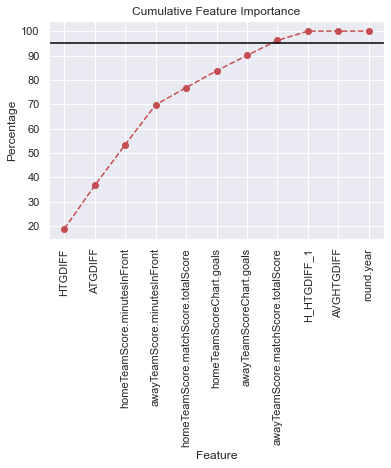

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

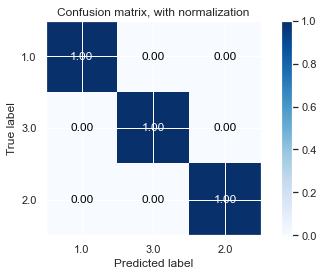

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 100.00%


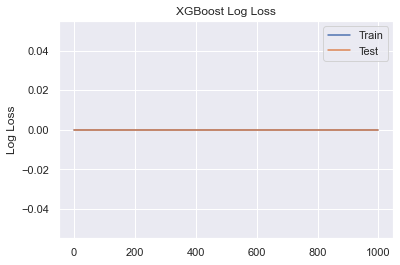

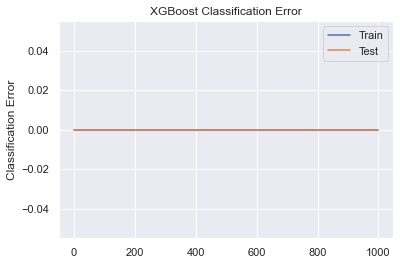

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
4,GWS Giants,Sydney Swans,3.0
5,Brisbane Lions,Port Adelaide,1.0
6,Hawthorn,North Melbourne,1.0
7,Adelaide Crows,Fremantle,3.0
8,West Coast Eagles,Gold Coast Suns,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
#xgb_df_next_games['predicted_result_probability'] = z_pred_prob
z_pred_prob

array([[0.24290831, 0.05853025, 0.69856143],
       [0.95124996, 0.02264418, 0.02610588],
       [0.7067756 , 0.05646249, 0.23676194],
       [0.02231506, 0.01977955, 0.95790535],
       [0.9577083 , 0.0207985 , 0.0214932 ]], dtype=float32)

In [26]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0] 
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]

In [27]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
4,GWS Giants,Sydney Swans,3.0,0.242908,0.058530,0.698561
5,Brisbane Lions,Port Adelaide,1.0,0.951250,0.022644,0.026106
6,Hawthorn,North Melbourne,1.0,0.706776,0.056462,0.236762
7,Adelaide Crows,Fremantle,3.0,0.022315,0.019780,0.957905
8,West Coast Eagles,Gold Coast Suns,1.0,0.957708,0.020799,0.021493
